# LAB 9 - FEATURE ENGINEERING + REGULARIZATION

This lab is comprise of 2 main sections:

 - 1. EDA and Feature Engineering
 
 - 2. Regression Analysis and Regularization Methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ames = pd.read_csv('Ames.csv')

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2930 non-null   int64  
 1   MSZoning       2930 non-null   object 
 2   LotFrontage    2440 non-null   float64
 3   LotArea        2930 non-null   float64
 4   Street         2930 non-null   object 
 5   Alley          2930 non-null   object 
 6   LotShape       2930 non-null   object 
 7   LandContour    2930 non-null   object 
 8   Utilities      2930 non-null   object 
 9   LotConfig      2930 non-null   object 
 10  LandSlope      2930 non-null   object 
 11  Neighborhood   2930 non-null   object 
 12  Condition1     2930 non-null   object 
 13  Condition2     2930 non-null   object 
 14  BldgType       2930 non-null   object 
 15  HouseStyle     2930 non-null   object 
 16  OverallQual    2930 non-null   int64  
 17  OverallCond    2930 non-null   int64  
 18  YearBuil

## EDA and Feature Engineering

First let's do some basic cleaning and exploratory analysis. We start by looking at the dependent variable

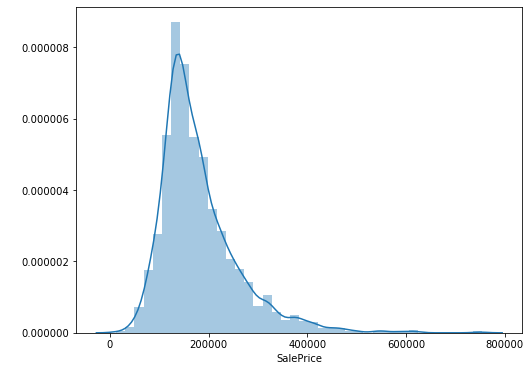

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [3]:
plt.figure(figsize=(8,6))
ax = sns.distplot(ames['SalePrice'], bins=40)

plt.xlabel('SalePrice')
plt.ylabel(' ')

plt.show()
ames['SalePrice'].describe()

Let's take log to be more fair in comparing high vs. low price homes

In [4]:
ames['LogSalePrice'] = ames['SalePrice'].apply(np.log)
ames.drop(columns='SalePrice', inplace=True)

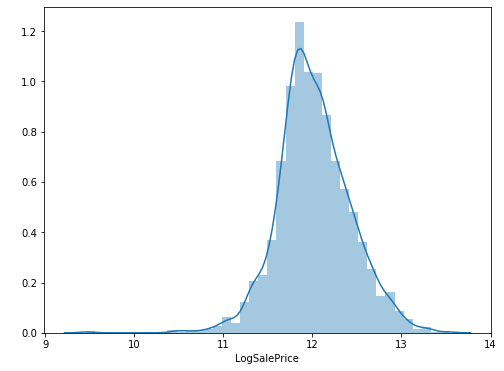

count    2930.000000
mean       12.020969
std         0.407587
min         9.456341
25%        11.771436
50%        11.982929
75%        12.271392
max        13.534473
Name: LogSalePrice, dtype: float64

In [5]:
plt.figure(figsize=(8,6))
ax = sns.distplot(ames['LogSalePrice'], bins=40)

plt.xlabel('LogSalePrice')
plt.ylabel(' ')

plt.show()
ames['LogSalePrice'].describe()

### Columns Names

One of the column names contains a dot. We rename it to avoid problems:

In [6]:
ames.rename(columns={'YearRemod.Add':'YearRemodAdd'}, inplace=True)

### Encode Condition Variables

Convert condition variables into dummy variables. We want variables that are equal to 1 if the condition is satisfied, which is either the case if `Condition1` or `Condition2` has the corresponding value.

In [7]:
condition = ames[['Condition1', 'Condition2']]

ames['Artery'] = pd.Series([1 if (condition.iloc[i] == 'Artery').any() else 0 for i in range(len(condition))])
ames['Feedr'] = pd.Series([1 if (condition.iloc[i] == 'Feedr').any() else 0 for i in range(len(condition))])
ames['PosA'] = pd.Series([1 if (condition.iloc[i] == 'PosA').any() else 0 for i in range(len(condition))])
ames['PosB'] = pd.Series([1 if (condition.iloc[i] == 'PosB').any() else 0 for i in range(len(condition))])
ames['RRAe'] = pd.Series([1 if (condition.iloc[i] == 'RRAe').any() else 0 for i in range(len(condition))])
ames['RRAn'] = pd.Series([1 if (condition.iloc[i] == 'RRAn').any() else 0 for i in range(len(condition))])
ames['RRNn'] = pd.Series([1 if (condition.iloc[i] == 'RRNn').any() else 0 for i in range(len(condition))])
ames['RRNe'] = pd.Series([1 if (i == 'RRNe') else 0 for i in ames['Condition1']])

ames.drop(columns=['Condition1', 'Condition2'], inplace=True)

### Encode Exterior Variables

Same treatment as with condition variables

In [8]:
exterior = ames[['Exterior1st', 'Exterior2nd']]

ames['ExteriorAsbShng'] = pd.Series([1 if (exterior.iloc[i] == 'AsbShng').any() else 0 for i in range(len(exterior))])
ames['ExteriorAsphShn'] = pd.Series([1 if (exterior.iloc[i] == 'AsphShn').any() else 0 for i in range(len(exterior))])
ames['ExteriorBrkComm'] = pd.Series([1 if (exterior.iloc[i] == 'BrkComm').any() else 0 for i in range(len(exterior))])
ames['ExteriorBrkFace'] = pd.Series([1 if (exterior.iloc[i] == 'BrkFace').any() else 0 for i in range(len(exterior))])
ames['ExteriorCBlock'] = pd.Series([1 if (exterior.iloc[i] == 'CBlock').any() else 0 for i in range(len(exterior))])
ames['ExteriorCemntBd'] = pd.Series([1 if (exterior.iloc[i] == 'CemntBd').any() else 0 for i in range(len(exterior))])
ames['ExteriorHdBoard'] = pd.Series([1 if (exterior.iloc[i] == 'HdBoard').any() else 0 for i in range(len(exterior))])
ames['ExteriorImStucc'] = pd.Series([1 if (exterior.iloc[i] == 'ImStucc').any() else 0 for i in range(len(exterior))])
ames['ExteriorMetalSd'] = pd.Series([1 if (exterior.iloc[i] == 'MetalSd').any() else 0 for i in range(len(exterior))])
ames['ExteriorPlywood'] = pd.Series([1 if (exterior.iloc[i] == 'Plywood').any() else 0 for i in range(len(exterior))])
ames['ExteriorPreCast'] = pd.Series([1 if (exterior.iloc[i] == 'PreCast').any() else 0 for i in range(len(exterior))])
ames['ExteriorStone'] = pd.Series([1 if (exterior.iloc[i] == 'Stone').any() else 0 for i in range(len(exterior))])
ames['ExteriorStucco'] = pd.Series([1 if (exterior.iloc[i] == 'Stucco').any() else 0 for i in range(len(exterior))])
ames['ExteriorVinylSd'] = pd.Series([1 if (exterior.iloc[i] == 'VinylSd').any() else 0 for i in range(len(exterior))])
ames['ExteriorWdSdng'] = pd.Series([1 if (exterior.iloc[i] == 'Wd Sdng').any() else 0 for i in range(len(exterior))])
ames['ExteriorWdShing'] = pd.Series([1 if (exterior.iloc[i] == 'WdShing').any() else 0 for i in range(len(exterior))])
ames['ExteriorOther'] = pd.Series([1 if (i == 'AsbShng') else 0 for i in ames['Exterior2nd']])


ames.drop(columns=['Exterior1st', 'Exterior2nd'], inplace=True)

### Encode Quality Variables

Let's look at the overall quality/condition variables.

In [9]:
# ames %>% ggplot(aes(x = as.factor(OverallQual), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(OverallCond), y = LogSalePrice)) + geom_boxplot()

Let's encode them to categorical:

In [10]:
ames = pd.get_dummies(ames, columns=['OverallQual', 'OverallCond'])

### Create New Features for Year Built & Year Remodeled

Let's see how sale price is affected by the year built and the year remodeled.

In [11]:
print(ames['YearBuilt'].describe(), '\n')
print(ames['YearRemodAdd'].describe())

count    2930.000000
mean     1971.356314
std        30.245361
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64 

count    2930.000000
mean     1984.266553
std        20.860286
min      1950.000000
25%      1965.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


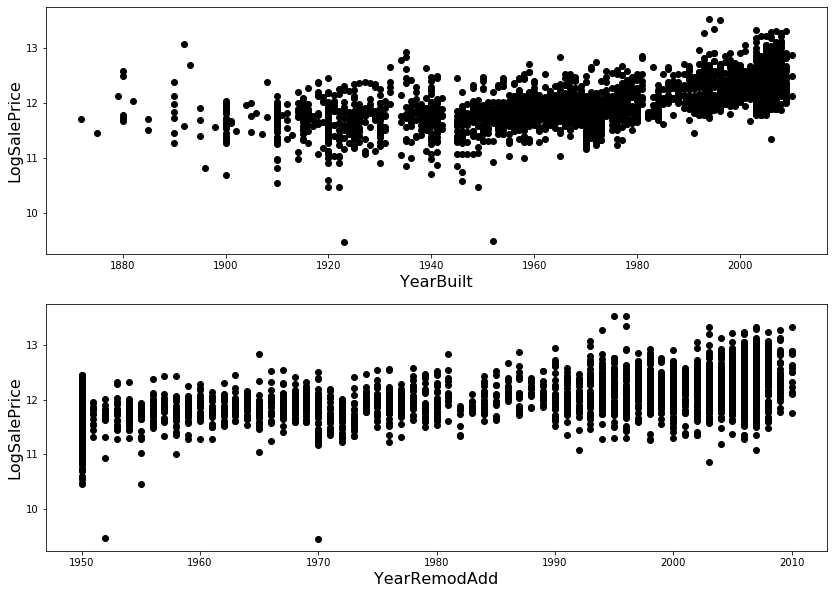

In [12]:
plt.figure(figsize=(14, 10))
plt.subplot(2,1,1)
# plt.plot(ames['YearBuilt'], ames['LogSalePrice'], color='black')  
plt.scatter(ames['YearBuilt'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('YearBuilt', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)

plt.subplot(2,1,2)
plt.scatter(ames['YearRemodAdd'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('YearRemodAdd', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)
plt.show()

Let's add features:
* `YearsSince1950Built` -- number of years after 1950 that the home was built (if before 1950, set to 0)
* `YearsSince1950Remod` -- number of years after 1950 that the home was remodeled

In [13]:
ames['YearsSince1950Built'] = pd.Series([(x - 1950) if (x > 1950) else 0 for x in ames['YearBuilt']])
ames['YearsSince1950Remod'] = pd.Series([(x - 1950) for x in ames['YearRemodAdd']])

ames.drop(columns=['YearBuilt', 'YearRemodAdd'], inplace=True)

### Remove Outliers and Mistakes

Text(0, 0.5, 'LogSalePrice')

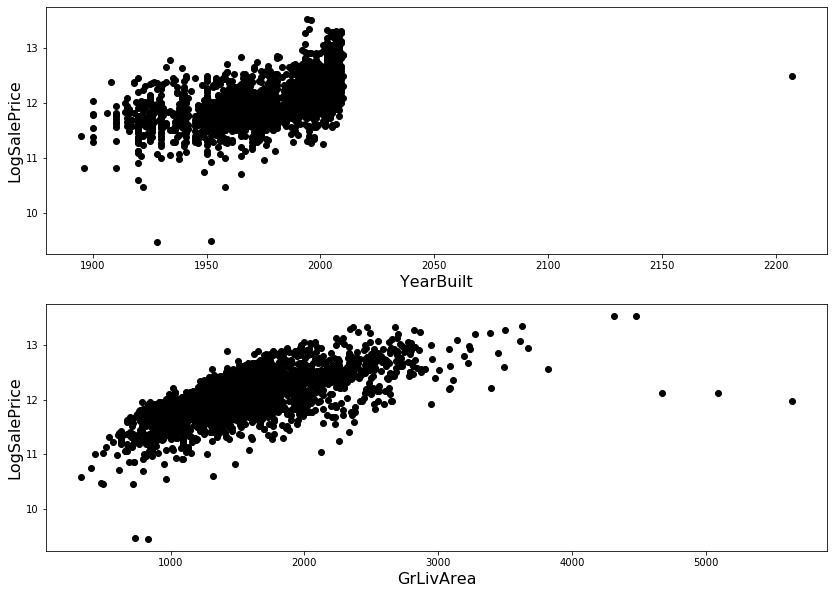

In [14]:
plt.figure(figsize=(14, 10))
plt.subplot(2,1,1)
plt.scatter(ames['GarageYrBlt'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('YearBuilt', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)

plt.subplot(2,1,2)
plt.scatter(ames['GrLivArea'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('GrLivArea', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)

Throw away outliers and mistakes:

In [15]:
ames['GarageYrBlt'] = pd.Series([np.NaN if (x > 2015) else x for x in ames['GarageYrBlt']])
ames['GrLivArea'] = pd.Series([np.NaN if (x > 4000) else x for x in ames['GrLivArea']])

Text(0, 0.5, 'LogSalePrice')

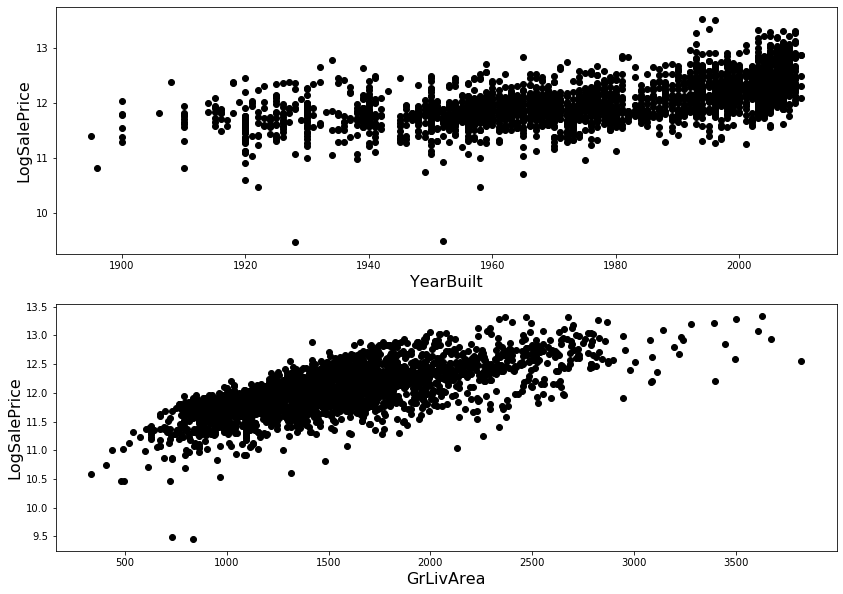

In [16]:
plt.figure(figsize=(14, 10))
plt.subplot(2,1,1)
plt.scatter(ames['GarageYrBlt'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('YearBuilt', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)

plt.subplot(2,1,2)
plt.scatter(ames['GrLivArea'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('GrLivArea', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)

Let's apply the same 1950 transformation to `GarageYrBlt`.

In [17]:
ames['YearsSince1950GarageBuilt'] = pd.Series([(x - 1950) if (x > 1950) else 0 for x in ames['GarageYrBlt']])
ames.drop(columns=['GarageYrBlt'], inplace=True)

### Encode Time Sold

Convert `YrSold` and `MoSold` variables to categoricals:

In [18]:
ames = pd.get_dummies(ames, columns=['YrSold', 'MoSold'])

Investigate furtther the time when the house was sold:

In [19]:
# ames %>% ggplot(aes(x = YrSold)) + geom_bar() + xlab("Year Sold")
# ames %>% ggplot(aes(x = YrSold, y = LogSalePrice)) + xlab("Year Sold") + ylab("Log(Sale Price)") + geom_boxplot()
# ames %>% ggplot(aes(x = MoSold, y = LogSalePrice)) + geom_boxplot()

### Handling NA Values

In [20]:
cols = np.sum(ames.isnull())
NA = cols[cols>0]
print(NA)

LotFrontage     490
MasVnrType       23
MasVnrArea       23
BsmtQual          1
BsmtCond          1
BsmtExposure      4
BsmtFinType1      1
BsmtFinSF1        1
BsmtFinType2      2
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Electrical        1
GrLivArea         5
BsmtFullBath      2
BsmtHalfBath      2
GarageFinish      2
GarageCars        1
GarageArea        1
GarageQual        1
GarageCond        1
dtype: int64


In [21]:
print(NA.index.to_numpy())

['LotFrontage' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' 'Electrical' 'GrLivArea' 'BsmtFullBath'
 'BsmtHalfBath' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond']


Dealing with NA columns:

* For numerical variables, NAs arise because some factor is already set to 0 (i.e, there is no basement), so we convert NAs to 0.

* For categorical variables, we add a new level corresponding to whether the variable is missing from that observation. We'll do this via dummy encoding as usual.


In [22]:
ames['LotFrontage'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['LotFrontage']])
# MasVnrType (categorical)
ames['MasVnrArea'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['MasVnrArea']])
# BsmtQual (categorical)
# BsmtCond (categorical)
# BsmtExposure (categorical)
# BsmtFinType1 (categorical)
# BsmtFinType2 (categorical)
ames['BsmtFinSF1'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['BsmtFinSF1']])
ames['BsmtFinSF2'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['BsmtFinSF2']])
ames['BsmtUnfSF'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['BsmtUnfSF']])
ames['TotalBsmtSF'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['TotalBsmtSF']])
# Electrical (categorical)
ames['BsmtFullBath'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['BsmtFullBath']])
ames['BsmtHalfBath'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['BsmtHalfBath']])
# GarageFinish (categorical)
ames['GarageCars'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['GarageCars']])
ames['GarageArea'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['GarageArea']])
# GarageQual (categorical)
# GarageCond (categorical)

ames['GrLivArea'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['GrLivArea']])
ames['YearsSince1950GarageBuilt'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['YearsSince1950GarageBuilt']])

In [23]:
categorical_cols = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                    'BsmtFinType2', 'Electrical', 'GarageFinish', 'GarageQual', 'GarageCond']
ames = pd.get_dummies(ames, columns=categorical_cols, dummy_na=True)

In [24]:
print(np.sum(ames.isnull().any()))

0


### Some More EDA

In [25]:
# Let's look at plots of some continuous variables vs. LogSalePrice.

# ```{r,  message=FALSE, warning=FALSE}
# ames %>% ggplot(aes(x = LotFrontage, y = LogSalePrice)) + geom_point()
# ames %>% ggplot(aes(x = LotArea, y = LogSalePrice)) + geom_point()
# ames %>% ggplot(aes(x = MasVnrArea, y = LogSalePrice)) + geom_point()
# ames %>% ggplot(aes(x = TotalBsmtSF, y = LogSalePrice)) + geom_point()
# ames %>% ggplot(aes(x = X1stFlrSF, y = LogSalePrice)) + geom_point()
# ames %>% ggplot(aes(x = X2ndFlrSF, y = LogSalePrice)) + geom_point()
# ames %>% ggplot(aes(x = PoolArea, y = LogSalePrice)) + geom_point()
# ames %>% ggplot(aes(x = GarageArea, y = LogSalePrice)) + geom_point()
# ```

# Smoothed versions of those plots.

# ```{r,  message=FALSE, warning=FALSE}
# ames %>% ggplot(aes(x = LotFrontage, y = LogSalePrice)) + geom_smooth()
# ames %>% ggplot(aes(x = LotArea, y = LogSalePrice)) + geom_smooth()
# ames %>% ggplot(aes(x = MasVnrArea, y = LogSalePrice)) + geom_smooth()
# ames %>% ggplot(aes(x = TotalBsmtSF, y = LogSalePrice)) + geom_smooth()
# ames %>% ggplot(aes(x = X1stFlrSF, y = LogSalePrice)) + geom_smooth()
# ames %>% ggplot(aes(x = X2ndFlrSF, y = LogSalePrice)) + geom_smooth()
# ames %>% ggplot(aes(x = PoolArea, y = LogSalePrice)) + geom_smooth()
# ames %>% ggplot(aes(x = GarageArea, y = LogSalePrice)) + geom_smooth()
# ```

# It appears that there are nonlinear relationships. Later, we will use polynomials to enhance our models. 

### Discrete Variables

Let's look at discrete variables now.

In [26]:
# ames %>% ggplot(aes(x = as.factor(BsmtFullBath), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(BsmtHalfBath), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(FullBath), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(HalfBath), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(BedroomAbvGr), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(KitchenAbvGr), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(TotRmsAbvGrd), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(Fireplaces), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(GarageCars), y = LogSalePrice)) + geom_boxplot()

Let's convert those all to factors.

In [27]:
discrete_cols = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MSSubClass']
ames = pd.get_dummies(ames, columns=discrete_cols)

In [28]:
ames.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,KitchenQual,Functional,FireplaceQu,GarageType,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,LogSalePrice,Artery,Feedr,PosA,PosB,RRAe,RRAn,RRNn,RRNe,ExteriorAsbShng,ExteriorAsphShn,ExteriorBrkComm,ExteriorBrkFace,ExteriorCBlock,ExteriorCemntBd,ExteriorHdBoard,ExteriorImStucc,ExteriorMetalSd,ExteriorPlywood,ExteriorPreCast,ExteriorStone,ExteriorStucco,ExteriorVinylSd,ExteriorWdSdng,ExteriorWdShing,ExteriorOther,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,YearsSince1950Built,YearsSince1950Remod,YearsSince1950GarageBuilt,YrSold_2006.0,YrSold_2007.0,YrSold_2008.0,YrSold_2009.0,...,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,GarageCond_nan,BsmtFullBath_0.0,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_0.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,FullBath_0.0,FullBath_1.0,FullBath_2.0,FullBath_3.0,FullBath_4.0,HalfBath_0.0,HalfBath_1.0,HalfBath_2.0,BedroomAbvGr_0.0,BedroomAbvGr_1.0,BedroomAbvGr_2.0,BedroomAbvGr_3.0,BedroomAbvGr_4.0,BedroomAbvGr_5.0,BedroomAbvGr_6.0,BedroomAbvGr_8.0,KitchenAbvGr_0.0,KitchenAbvGr_1.0,KitchenAbvGr_2.0,KitchenAbvGr_3.0,TotRmsAbvGrd_2.0,TotRmsAbvGrd_3.0,TotRmsAbvGrd_4.0,TotRmsAbvGrd_5.0,TotRmsAbvGrd_6.0,TotRmsAbvGrd_7.0,TotRmsAbvGrd_8.0,TotRmsAbvGrd_9.0,TotRmsAbvGrd_10.0,TotRmsAbvGrd_11.0,TotRmsAbvGrd_12.0,TotRmsAbvGrd_13.0,TotRmsAbvGrd_14.0,TotRmsAbvGrd_15.0,Fireplaces_0.0,Fireplaces_1.0,Fireplaces_2.0,Fireplaces_3.0,Fireplaces_4.0,GarageCars_0.0,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,RL,141.0,31770.0,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,1Story,Hip,CompShg,112.0,TA,TA,CBlock,639.0,0.0,441.0,1080.0,GasA,Fa,Y,1656.0,0.0,0.0,1656.0,TA,Typ,Gd,Attchd,528.0,P,210.0,62.0,0.0,0.0,0.0,0.0,NoPool,NoFence,None,0.0,WD,Normal,12.278393,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,10.0,10.0,10.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,RH,80.0,11622.0,Pave,NoAccess,Reg,Lvl,AllPub,Inside,Gtl,NAmes,1Fam,1Story,Gable,CompShg,0.0,TA,TA,CBlock,468.0,144.0,270.0,882.0,GasA,TA,Y,896.0,0.0,0.0,896.0,TA,Typ,NoFirePlace,Attchd,730.0,Y,140.0,0.0,0.0,0.0,120.0,0.0,NoPool,MnPrv,None,0.0,WD,Normal,11.561716,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,11.0,11.0,11.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,RL,81.0,14267.0,Pave,NoAccess,IR1,Lvl,AllPub

### Other Categoricals

We still have many columns that are categorical. We must encode them before passing them to our models

In [29]:
still_categorical = ames.columns[ames.dtypes == 'object']
for col in still_categorical:
    print(col, ':\n', ames[col].unique())

MSZoning :
 ['RL' 'RH' 'FV' 'RM' 'C' 'I' 'A']
Street :
 ['Pave' 'Grvl']
Alley :
 ['NoAccess' 'Pave' 'Grvl']
LotShape :
 ['IR1' 'Reg' 'IR2' 'IR3']
LandContour :
 ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities :
 ['AllPub' 'NoSewr' 'NoSeWa']
LotConfig :
 ['Corner' 'Inside' 'CulDSac' 'FR2' 'FR3']
LandSlope :
 ['Gtl' 'Mod' 'Sev']
Neighborhood :
 ['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']
BldgType :
 ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
HouseStyle :
 ['1Story' '2Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '1.5Unf' '2.5Fin']
RoofStyle :
 ['Hip' 'Gable' 'Mansard' 'Gambrel' 'Shed' 'Flat']
RoofMatl :
 ['CompShg' 'WdShake' 'Tar&Grv' 'WdShngl' 'Membran' 'ClyTile' 'Roll'
 'Metal']
ExterQual :
 ['TA' 'Gd' 'Ex' 'Fa']
ExterCond :
 ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Foundation :
 ['CBlock

In [30]:
ames = pd.get_dummies(ames, columns=still_categorical)
ames.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,LogSalePrice,Artery,Feedr,PosA,PosB,RRAe,RRAn,RRNn,RRNe,ExteriorAsbShng,ExteriorAsphShn,ExteriorBrkComm,ExteriorBrkFace,ExteriorCBlock,ExteriorCemntBd,ExteriorHdBoard,ExteriorImStucc,ExteriorMetalSd,ExteriorPlywood,ExteriorPreCast,ExteriorStone,ExteriorStucco,ExteriorVinylSd,ExteriorWdSdng,ExteriorWdShing,ExteriorOther,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,YearsSince1950Built,YearsSince1950Remod,YearsSince1950GarageBuilt,YrSold_2006.0,YrSold_2007.0,YrSold_2008.0,YrSold_2009.0,YrSold_2010.0,MoSold_1.0,MoSold_2.0,MoSold_3.0,MoSold_4.0,MoSold_5.0,MoSold_6.0,MoSold_7.0,MoSold_8.0,MoSold_9.0,MoSold_10.0,MoSold_11.0,MoSold_12.0,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_CBlock,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_Po,BsmtQual_TA,BsmtQual_nan,BsmtCond_Ex,BsmtCond_Fa,BsmtCond_Gd,...,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFirePlace,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_NoPool,PoolQC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,MiscFeature_Elev,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,141.0,31770.0,112.0,639.0,0.0,441.0,1080.0,1656.0,0.0,0.0,1656.0,528.0,210.0,62.0,0.0,0.0,0.0,0.0,0.0,12.278393,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,10.0,10.0,10.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,11622.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,11.561716,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,11.0,11.0,11.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,81.0,14267.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,12.055250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,8.0,8.0

## Regression Analysis and Regularization Methods

### Helper Functions

In [31]:
def OSR2(y_train, y_test, y_pred):
    
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [32]:
def MAE(y_test, y_pred):
    
    return (np.mean(abs(y_test - y_pred)))

In [33]:
def RMSE(y_test, y_pred):
    
    return np.sqrt(np.mean((y_test - y_pred)**2))

In [34]:
def print_metrics(model, X_train, y_train, X_test, y_test, flag_log_sale_price=False):

    if (flag_log_sale_price == True):
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        print("\nMetrics for Log(Sale Price):\n")
        
    elif (flag_log_sale_price == False):
        
        y_pred_train = pd.Series(model.predict(X_train)).apply(np.exp)
        y_pred_test = pd.Series(model.predict(X_test)).apply(np.exp)
        y_train = y_train.copy().apply(np.exp)
        y_test = y_test.copy().apply(np.exp)
        
        print("\nMetrics for Sale Price:\n")

    print('Training R2', OSR2(y_train, y_train, y_pred_train))
    print('Training MAE', MAE(y_train, y_pred_train))
    print('Training RMSE', RMSE(y_train, y_pred_train))

    print('Out-of-sample R2', OSR2(y_train, y_test, y_pred_test))
    print('Out-of-sample MAE', MAE(y_test, y_pred_test))
    print('Out-of-sample RMSE', RMSE(y_test, y_pred_test))
    
    return None

### Sequential Split

In [35]:
# ames %>% ggplot(aes(x = YrSold)) + geom_bar()

In [36]:
ames_train = ames[(ames['YrSold_2006.0'] == 1) | (ames['YrSold_2007.0'] == 1) | (ames['YrSold_2008.0'] == 1)]
ames_test = ames[(ames['YrSold_2009.0'] == 1) | (ames['YrSold_2010.0'] == 1)]

print(ames.shape, ames_train.shape, ames_test.shape)

(2930, 394) (1941, 394) (989, 394)


In [37]:
y_train = ames_train['LogSalePrice']
y_test = ames_test['LogSalePrice']

X_train = ames_train.drop(columns='LogSalePrice')
X_test = ames_test.drop(columns='LogSalePrice')

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1941, 393) (1941,) (989, 393) (989,)


### Higher-order Variables

We can construct features using a polynomial transformation. This will be especially relevant with the regularization methods that we will use, as redundat features will be smartly* discarded from the model. <- improve this sentence


In [38]:
def create_polynomial_features(df, n_degree):

    new_df = None
    
    for i in range(2, n_degree+1):
        
        tmp = df.pow(i)
        
        affix = '_pow_'+str(i)
        tmp.columns = list(map(lambda x: x + affix, df.columns))
        
        if new_df is not None:
            new_df = pd.concat([new_df, tmp], axis=1)
        else:
            new_df = tmp
    
    return new_df

NOTE: An important consideration when creating higher-order variables is that the resulting features will tend to have some degree of linear dependence amongst themselves. This is normal as several new features are based on their zero-th power peer. Such correlation can also yield a high degree of multicollinearity in the regression models. The `sklearn` implementations that we will be using do not automatically account for this phenomenon, therefore we must be careful in selection the `n_degree`, and analyzing the model fit. 

In [39]:
poly_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
             'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
             'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'MiscVal', 'YearsSince1950Built',
             'YearsSince1950Remod', 'YearsSince1950GarageBuilt']

In [40]:
n_degree = 3

X_train_poly = pd.concat([X_train, create_polynomial_features(X_train[poly_cols], n_degree)], axis=1)
X_test_poly = pd.concat([X_test, create_polynomial_features(X_test[poly_cols], n_degree)], axis=1)

print(X_train.shape, X_test.shape)
print(create_polynomial_features(X_train[poly_cols], n_degree).shape, 
      create_polynomial_features(X_test[poly_cols], n_degree).shape)
print(X_train_poly.shape, X_test_poly.shape)

(1941, 393) (989, 393)
(1941, 42) (989, 42)
(1941, 435) (989, 435)


### Naive Linear Regression

In [41]:
import statsmodels.api as sm

X_train_nlr = sm.add_constant(X_train_poly)
X_test_nlr = sm.add_constant(X_test_poly)

nlr = sm.OLS(y_train, X_train_nlr).fit()

print(nlr.summary())

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     287.4
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:35:58   Log-Likelihood:                 1181.3
No. Observations:                1941   AIC:                            -2251.
Df Residuals:                    1885   BIC:                            -1939.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### "Common Sense" Linear Regression

We want to perform linear regression with only some of the variables which could be chosen using common sense

In [42]:
def get_columns_startswith(df, column_start_string):

    cols_startswith = []

    for i in column_start_string:
        for j in df:
            if j.startswith(i):  
                cols_startswith.append(j) 

    return cols_startswith

In [43]:
common_sense_cols = ['MSSubClass', 'OverallQual', 'YearsSince1950Built',
                     'GrLivArea', 'TotRmsAbvGrd','FullBath', 'SaleCondition']
    
common_sense_cols = get_columns_startswith(X_train, column_start_string=common_sense_cols)
common_sense_cols

['MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'OverallQual_1',
 'OverallQual_2',
 'OverallQual_3',
 'OverallQual_4',
 'OverallQual_5',
 'OverallQual_6',
 'OverallQual_7',
 'OverallQual_8',
 'OverallQual_9',
 'OverallQual_10',
 'YearsSince1950Built',
 'GrLivArea',
 'TotRmsAbvGrd_2.0',
 'TotRmsAbvGrd_3.0',
 'TotRmsAbvGrd_4.0',
 'TotRmsAbvGrd_5.0',
 'TotRmsAbvGrd_6.0',
 'TotRmsAbvGrd_7.0',
 'TotRmsAbvGrd_8.0',
 'TotRmsAbvGrd_9.0',
 'TotRmsAbvGrd_10.0',
 'TotRmsAbvGrd_11.0',
 'TotRmsAbvGrd_12.0',
 'TotRmsAbvGrd_13.0',
 'TotRmsAbvGrd_14.0',
 'TotRmsAbvGrd_15.0',
 'FullBath_0.0',
 'FullBath_1.0',
 'FullBath_2.0',
 'FullBath_3.0',
 'FullBath_4.0',
 'SaleCondition_Abnorml',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 

However, some of these include categorical columns which we would prefer to analyze as numerical variables!

`OverallQual`
`TotRmsAbvGrd`
`FullBath`

In [44]:
to_numeric_cols = ['OverallQual', 'TotRmsAbvGrd', 'FullBath']

to_numeric_cols = get_columns_startswith(X_train, to_numeric_cols)
to_numeric_cols

['OverallQual_1',
 'OverallQual_2',
 'OverallQual_3',
 'OverallQual_4',
 'OverallQual_5',
 'OverallQual_6',
 'OverallQual_7',
 'OverallQual_8',
 'OverallQual_9',
 'OverallQual_10',
 'TotRmsAbvGrd_2.0',
 'TotRmsAbvGrd_3.0',
 'TotRmsAbvGrd_4.0',
 'TotRmsAbvGrd_5.0',
 'TotRmsAbvGrd_6.0',
 'TotRmsAbvGrd_7.0',
 'TotRmsAbvGrd_8.0',
 'TotRmsAbvGrd_9.0',
 'TotRmsAbvGrd_10.0',
 'TotRmsAbvGrd_11.0',
 'TotRmsAbvGrd_12.0',
 'TotRmsAbvGrd_13.0',
 'TotRmsAbvGrd_14.0',
 'TotRmsAbvGrd_15.0',
 'FullBath_0.0',
 'FullBath_1.0',
 'FullBath_2.0',
 'FullBath_3.0',
 'FullBath_4.0']

In [45]:
# If we wanted to decode these columns back into their original form, we could define a `reverse_dummy` function:

In [46]:
## DECODING FUNCTION

# No need to understand this function. Converts dummies back. Reference [2]
    
from collections import defaultdict

def reverse_dummy(df_dummies):
    
    pos = defaultdict(list)
    vals = defaultdict(list)

    for i, c in enumerate(df_dummies.columns):
        if "_" in c:
            k, v = c.split("_", 1)
            pos[k].append(i)
            vals[k].append(v)
        else:
            pos["_"].append(i)

    df = pd.DataFrame({k: pd.Categorical.from_codes(
                              np.argmax(df_dummies.iloc[:, pos[k]].values, axis=1),
                              vals[k])
                      for k in vals})

    df[df_dummies.columns[pos["_"]]] = df_dummies.iloc[:, pos["_"]]
    
    return df

But we can simplify our lives by simply using the old data, and performing the train-test split again

In [47]:
# ames2 = pd.read_csv('Ames.csv')
# # ames2_train = ames2[(ames2['YrSold_2006.0'] == 1) | (ames2['YrSold_2007.0'] == 1) | (ames2['YrSold_2008.0'] == 1)]
# ames2_train = ames2[ames2['YrSold'] > 2006]
# ames2_train[['OverallQual', 'TotRmsAbvGrd', 'FullBath']]
# ames2_train.shape

# X_train_tnc = ames_encoded[ames_encoded[(ames_encoded['YrSold_2006.0'] == 1) | (ames_encoded['YrSold_2007.0'] == 1) | (ames_encoded['YrSold_2008.0'] == 1)]
# X_train_tnc = X_train_tnc[['OverallQual', 'TotRmsAbvGrd', 'FullBath']].astype('float')

For our desired dataframe, we want to get the concatenate the commons with the numeric


In [48]:
common_sense_less_numeric = sorted(list(set(common_sense_cols) - set(to_numeric_cols)))

X_train_csln = X_train[common_sense_less_numeric]
X_train_tnc = reverse_dummy(X_train[to_numeric_cols]).astype('float')
X_train_tnc.index = X_train.index
X_train_cslr = pd.concat([X_train_csln, X_train_tnc], axis=1)

X_test_csln = X_test[common_sense_less_numeric]
X_test_tnc = reverse_dummy(X_test[to_numeric_cols]).astype('float')
X_test_tnc.index = X_test.index
X_test_cslr = pd.concat([X_test_csln, X_test_tnc], axis=1)

In [49]:
## MODEL FITTING

In [50]:
X_train_cslr = sm.add_constant(X_train_cslr)
X_test_cslr = sm.add_constant(X_test_cslr)

cslr = sm.OLS(y_train, X_train_cslr).fit()

print(cslr.summary())

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     407.9
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:35:58   Log-Likelihood:                 798.03
No. Observations:                1941   AIC:                            -1544.
Df Residuals:                    1915   BIC:                            -1399.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.56

In [51]:
print_metrics(cslr, X_train_cslr, y_train, X_test_cslr, y_test, flag_log_sale_price = True)
print_metrics(cslr, X_train_cslr, y_train, X_test_cslr, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.8418842048283758
Training MAE 0.11258925110325264
Training RMSE 0.16040017299602197
Out-of-sample R2 0.8292511743236439
Out-of-sample MAE 0.12020295411992925
Out-of-sample RMSE 0.17178568172757525

Metrics for Sale Price:

Training R2 0.822065501990403
Training MAE 20291.92162138758
Training RMSE 33908.81220113828
Out-of-sample R2 0.867594168866144
Out-of-sample MAE 20212.32328687979
Out-of-sample RMSE 28704.23803180362


### Principal Components Regression

We first remove columns that are nearly constant, i.e., have small standard deviation. Then we use sklearn grid-search for cross validation and finally retrain the final model.  

In [52]:
X_train_pcr = X_train_poly.loc[:, X_train_poly.std() > 0.1]
X_test_pcr = X_test_poly[X_train_pcr.columns]
print(X_train.shape, X_train_pcr.shape)
print(X_test.shape, X_test_pcr.shape)

(1941, 393) (1941, 306)
(989, 393) (989, 306)


We also standardize the data before feeding it to the PCA step, as recommended by good practice.

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
pca = PCA(random_state=88)
lr = LinearRegression()
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('lr', lr)])

param_grid = {'pca__n_components': np.linspace(1, 100, 100).astype('int')}

In [54]:
# def best_alpha_index(results):
    
#     K = len([x for x in list(results.keys()) if x.startswith('split')])
#     alpha_range = results['param_ridge__alpha'].data
    
#     mean_per_alpha = pd.Series(results['mean_test_score'], index = alpha_range)
#     std_per_alpha  = pd.Series(results['std_test_score'], index = alpha_range)
#     sem_per_alpha  = std_per_alpha / np.sqrt(K)

#     max_score  = mean_per_alpha.max()
#     sem        = sem_per_alpha[mean_per_alpha.idxmax()]
#     best_alpha = mean_per_alpha[mean_per_alpha >= max_score - sem].index.max()
    
#     best_alpha_index = int(np.argwhere(alpha_range == best_alpha)[0])
    
#     return best_alpha_index

In [55]:
pcr_cv = GridSearchCV(pipe,
                      param_grid,
                      scoring='neg_mean_squared_error',
#                       refit='best_alpha_index',
                      cv=10)
pcr_cv.fit(X_train_pcr, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(random_state=88)),
                                       ('lr', LinearRegression())]),
             param_grid={'pca__n_components': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])},
             scoring='neg_mean_squared_error')

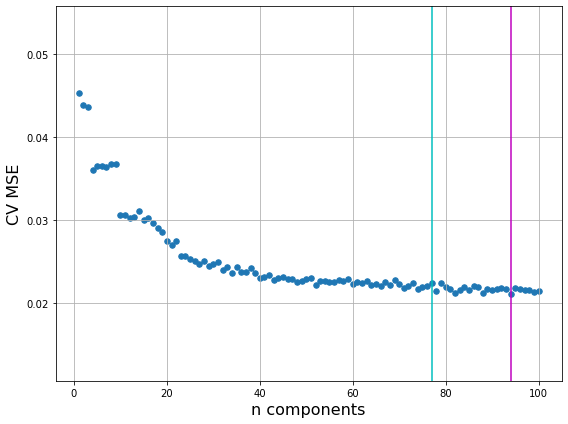

In [56]:
from scipy import stats

n_components = pcr_cv.cv_results_['param_pca__n_components'].data
MSE_scores = pcr_cv.cv_results_['mean_test_score']*(-1)

x_minimizer = n_components[np.argmin(MSE_scores)]
MSE_se = stats.sem(MSE_scores)
MSE_1se_rule = min(MSE_scores)+stats.sem(MSE_scores)
x_1se_rule = np.where(MSE_scores <= MSE_1se_rule)[0][0]

plt.figure(figsize=(8, 6))
plt.xlabel('n components', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(n_components, MSE_scores, s=30)
plt.axvline(x=x_minimizer, color='m')
plt.axvline(x=x_1se_rule, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [57]:
# print(pcr_cv.best_params_)
# print('CV best score:', pcr_cv.best_score_*(-1))

print('pca n_components', x_1se_rule)
print('CV best MSE score:', MSE_scores[x_1se_rule])

pca n_components 77
CV best MSE score: 0.021485007066151817


In [58]:
print_metrics(pcr_cv, X_train_pcr, y_train, X_test_pcr, y_test, flag_log_sale_price = True)
print_metrics(pcr_cv, X_train_pcr, y_train, X_test_pcr, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.9064415983669236
Training MAE 0.08457885133148384
Training RMSE 0.12338393049437028
Out-of-sample R2 0.8823411796793669
Out-of-sample MAE 0.09772973270989092
Out-of-sample RMSE 0.14260026901979211

Metrics for Sale Price:

Training R2 -0.029407687712843744
Training MAE 83565.49696913065
Training RMSE 116458.3132129591
Out-of-sample R2 0.9085949932237553
Out-of-sample MAE 16425.506588486
Out-of-sample RMSE 23849.400104316694


### Ridge Regression

We can choose `alpha_max` so as the value that makes all coefficientes zero, and then construct a log sequence of `alpha` values trending smaller, decreasing the degree of regularization. 

For the case of `Ridge` Regression, alpha value that would make all coefficients zero would be `Inf`, however we can be satisfied with sufficiently small numbers, and work from there.

In [59]:
X_train_rr = X_train_poly
X_test_rr = X_test_poly

print(X_train_rr.shape, X_test_rr.shape)

(1941, 435) (989, 435)


### Single fit to evaluate alpha_max

In [60]:
from sklearn.linear_model import Ridge

alpha_max = 10**6
rr = Ridge(alpha=alpha_max, fit_intercept=False, random_state=88)
rr.fit(X_train_rr, y_train)

/Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.35306e-26): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1000000, fit_intercept=False, random_state=88)

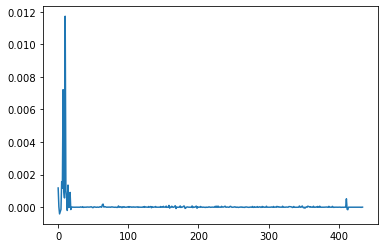

0.011720115436381177


In [61]:
plt.plot(rr.coef_)
plt.show()
print(max(abs(rr.coef_)))

### Coefficients vs. degree of regularization

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
alpha_grid = np.logspace(-2, 6, num=50, base=10)
coefs = []

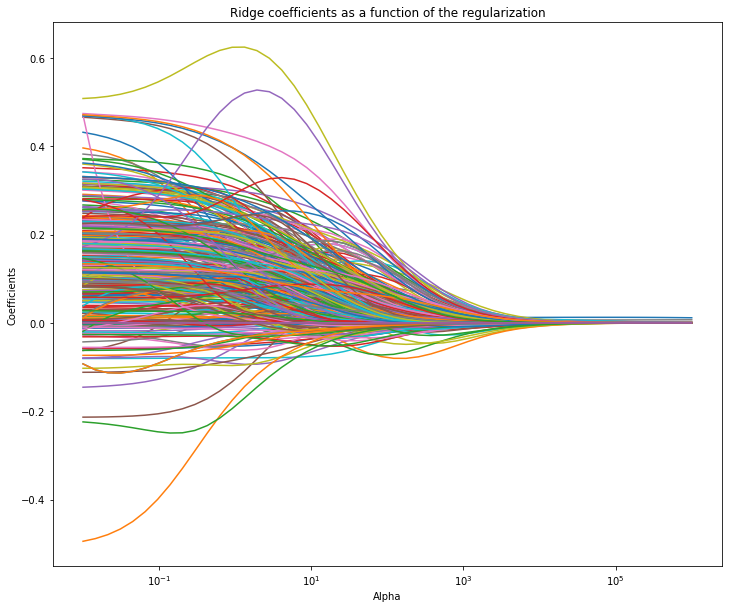

In [64]:
for a in alpha_grid:
    rr = Ridge(alpha=a, fit_intercept=False, random_state=88)
    rr.fit(X_train_rr, y_train)
    coefs.append(rr.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alpha_grid, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

### Ridge Cross-validation

In [65]:
alpha_grid = {'alpha': np.logspace(-2, 6, num=50, base=10)}

rr_cv = GridSearchCV(rr, alpha_grid, scoring='neg_mean_squared_error', cv=10)
rr_cv.fit(X_train_rr, y_train)

GridSearchCV(cv=10,
             estimator=Ridge(alpha=1000000.0, fit_intercept=False,
                             random_state=88),
             param_grid={'alpha': array([1.00000000e-02, 1.45634848e-02, 2.12095089e-02, 3.08884360e-02,
       4.49843267e-02, 6.55128557e-02, 9.54095476e-02, 1.38949549e-01,
       2.02358965e-01, 2.94705170e-01, 4.29193426e-01, 6.25055193e-01,
       9.10298178e-01, 1.32571137e+00, 1.93069773e+00, 2.81176870...
       3.72759372e+02, 5.42867544e+02, 7.90604321e+02, 1.15139540e+03,
       1.67683294e+03, 2.44205309e+03, 3.55648031e+03, 5.17947468e+03,
       7.54312006e+03, 1.09854114e+04, 1.59985872e+04, 2.32995181e+04,
       3.39322177e+04, 4.94171336e+04, 7.19685673e+04, 1.04811313e+05,
       1.52641797e+05, 2.22299648e+05, 3.23745754e+05, 4.71486636e+05,
       6.86648845e+05, 1.00000000e+06])},
             scoring='neg_mean_squared_error')

In [66]:
def find_nearest(array, value): 
    
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    
    return array[idx]

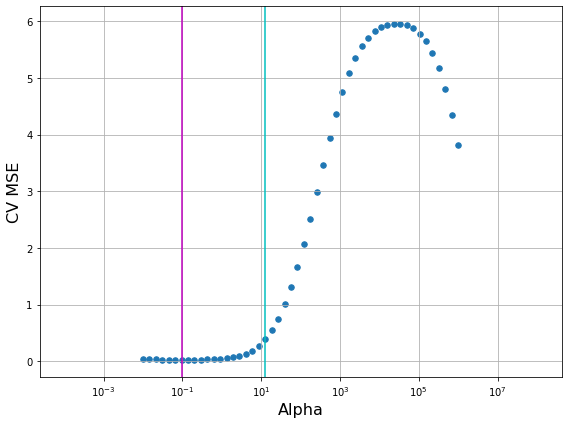

In [67]:
alpha_grid = rr_cv.cv_results_['param_alpha'].data
MSE_scores = rr_cv.cv_results_['mean_test_score']*(-1)

x_minimizer = alpha_grid[np.argmin(MSE_scores)]
MSE_se = stats.sem(MSE_scores)

MSE_1se_rule = min(MSE_scores)+stats.sem(MSE_scores)
MSE_nearest = find_nearest(MSE_scores, MSE_1se_rule)
idx_nearest = np.where(MSE_scores == MSE_nearest)[0][0]
x_1se_rule = alpha_grid[idx_nearest]

plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(alpha_grid, MSE_scores, s=30)
plt.axvline(x=x_minimizer, color='m')
plt.axvline(x=x_1se_rule, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

Left vertical line is the minimizer, the right vertical line, is the "1 Standard Error" selection.

In [68]:
print_metrics(rr_cv, X_train_rr, y_train, X_test_rr, y_test, flag_log_sale_price = True)
print_metrics(rr_cv, X_train_rr, y_train, X_test_rr, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.9599531238292923
Training MAE 0.05730976369464096
Training RMSE 0.08072378677034518
Out-of-sample R2 0.3747388575749836
Out-of-sample MAE 0.3066857076696081
Out-of-sample RMSE 0.32872960649117633

Metrics for Sale Price:

Training R2 -0.041366118422217824
Training MAE 84642.9401181786
Training RMSE 117132.79692193118
Out-of-sample R2 0.5189762927958869
Out-of-sample MAE 47050.90309950206
Out-of-sample RMSE 54711.13285590078


### Lasso Regression

In [69]:
X_train_lasso = X_train_poly
X_test_lasso = X_test_poly

print(X_train_lasso.shape, X_test_lasso.shape)

(1941, 435) (989, 435)


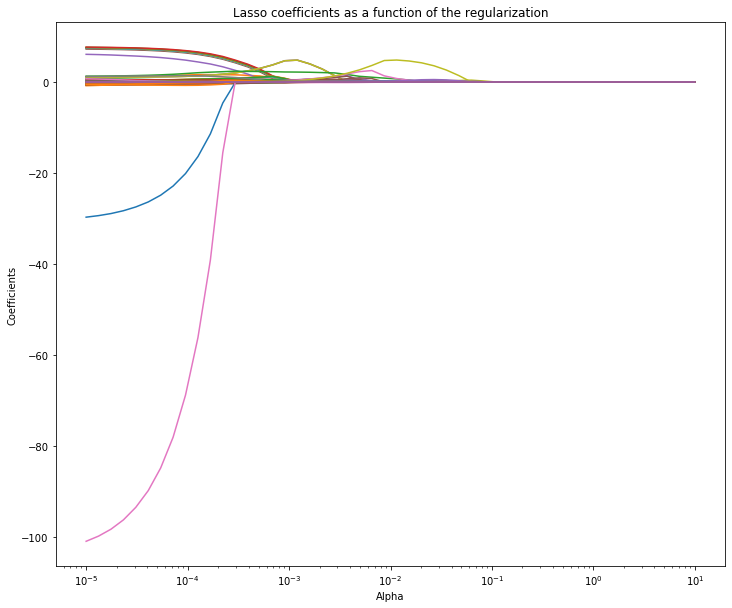

In [70]:
from sklearn.linear_model import Lasso

alphas = np.logspace(-5, 1, num=50, base=10)
coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False, max_iter=1000, random_state=88)
    lasso.fit(X_train_lasso, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

### Cross-validation

`sklearn` also provides packages that can perform cross-validation directly within the regression algorithm and it's more efficient than the separated search. Optional arguments are `n_alphas` or `alphas_`; if none given the model assumes `n_alphas = 100` as default and computes de interval automatically.

In [71]:
from sklearn.linear_model import LassoCV

alpha_grid = np.logspace(-5, 1, num=50, base=10)

lasso_cv = LassoCV(alphas=alpha_grid, random_state=88, cv=10)
lasso_cv.fit(X_train_lasso, y_train)

LassoCV(alphas=array([1.00000000e-05, 1.32571137e-05, 1.75751062e-05, 2.32995181e-05,
       3.08884360e-05, 4.09491506e-05, 5.42867544e-05, 7.19685673e-05,
       9.54095476e-05, 1.26485522e-04, 1.67683294e-04, 2.22299648e-04,
       2.94705170e-04, 3.90693994e-04, 5.17947468e-04, 6.86648845e-04,
       9.10298178e-04, 1.20679264e-03, 1.59985872e-03, 2.12095089e-03,
       2.81176870e-03, 3.72759372e-0...
       2.68269580e-02, 3.55648031e-02, 4.71486636e-02, 6.25055193e-02,
       8.28642773e-02, 1.09854114e-01, 1.45634848e-01, 1.93069773e-01,
       2.55954792e-01, 3.39322177e-01, 4.49843267e-01, 5.96362332e-01,
       7.90604321e-01, 1.04811313e+00, 1.38949549e+00, 1.84206997e+00,
       2.44205309e+00, 3.23745754e+00, 4.29193426e+00, 5.68986603e+00,
       7.54312006e+00, 1.00000000e+01]),
        cv=10, random_state=88)

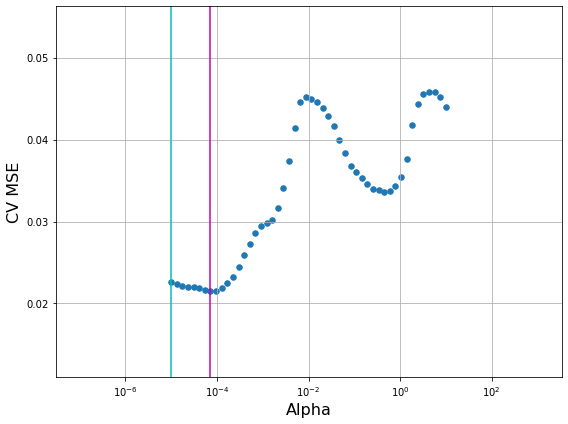

In [72]:
alpha_grid = lasso_cv.alphas_
MSE_scores = np.mean(lasso_cv.mse_path_, axis=1)

x_minimizer = alpha_grid[np.argmin(MSE_scores)]
MSE_se = stats.sem(MSE_scores)

MSE_1se_rule = min(MSE_scores)+stats.sem(MSE_scores)
MSE_nearest = find_nearest(MSE_scores, MSE_1se_rule)
idx_nearest = np.where(MSE_scores == MSE_nearest)[0][0]
x_1se_rule = alpha_grid[idx_nearest]

plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(alpha_grid, MSE_scores, s=30)
plt.axvline(x=x_minimizer, color='m')
plt.axvline(x=x_1se_rule, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [73]:
print_metrics(lasso_cv, X_train_lasso, y_train, X_test_lasso, y_test, flag_log_sale_price = True)
print_metrics(lasso_cv, X_train_lasso, y_train, X_test_lasso, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.9579835602613067
Training MAE 0.05877101760985972
Training RMSE 0.08268501870047279
Out-of-sample R2 0.8894935761974384
Out-of-sample MAE 0.08570104326164696
Out-of-sample RMSE 0.13819803317729587

Metrics for Sale Price:

Training R2 -0.0395712138794142
Training MAE 84563.6971147335
Training RMSE 117031.80801063434
Out-of-sample R2 0.9200085835541757
Out-of-sample MAE 14247.879741209495
Out-of-sample RMSE 22310.74951956502


Let's look at some of the variables selected by lasso

In [74]:
cols = X_train_lasso.columns
coefs = lasso_cv.coef_
sorted(zip(abs(coefs), cols))[-28:]

[(0.0739930413683639, 'FullBath_0.0'),
 (0.0750656165879429, 'OverallCond_4'),
 (0.07544619817916812, 'Functional_Sev'),
 (0.07820688655436532, 'OverallCond_7'),
 (0.08643455400332736, 'OverallQual_8'),
 (0.08763385683426633, 'Neighborhood_StoneBr'),
 (0.09145818508538113, 'Neighborhood_Blueste'),
 (0.09338788135245063, 'Neighborhood_Crawfor'),
 (0.09730089960389775, 'OverallCond_8'),
 (0.10829974658379923, 'ExteriorBrkComm'),
 (0.10945805485962164, 'SaleType_ConLI'),
 (0.11322813041135371, 'OverallCond_9'),
 (0.11865521014708297, 'OverallQual_3'),
 (0.12141249221051899, 'RoofStyle_Shed'),
 (0.13039003569319785, 'MasVnrType_CBlock'),
 (0.14739328160088147, 'OverallQual_9'),
 (0.15356246586411187, 'MSZoning_C'),
 (0.16298272767635497, 'RoofMatl_WdShngl'),
 (0.17471452580053456, 'OverallCond_2'),
 (0.17826001182823642, 'OverallCond_3'),
 (0.18963681862544216, 'OverallQual_10'),
 (0.19503571824089472, 'ExteriorPreCast'),
 (0.198644061354469, 'OverallCond_1'),
 (0.2797179764711786, 'Overal

### Naive Least Squares

We can also recover the predictions for the Naive Least Squares model from the fitted Ridge model by using `alpha = 0`.

Simply recompute the estimator at `alpha = 0` instead of doing an interpolation over the whole alpha grid.

In [75]:
lasso_cv.set_params(alphas=0)
lasso_cv.get_params()

{'alphas': 0,
 'copy_X': True,
 'cv': 10,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': False,
 'positive': False,
 'precompute': 'auto',
 'random_state': 88,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [76]:
print_metrics(lasso_cv, X_train_lasso, y_train, X_test_lasso, y_test, flag_log_sale_price = True)
print_metrics(lasso_cv, X_train_lasso, y_train, X_test_lasso, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.9579835602613067
Training MAE 0.05877101760985972
Training RMSE 0.08268501870047279
Out-of-sample R2 0.8894935761974384
Out-of-sample MAE 0.08570104326164696
Out-of-sample RMSE 0.13819803317729587

Metrics for Sale Price:

Training R2 -0.0395712138794142
Training MAE 84563.6971147335
Training RMSE 117031.80801063434
Out-of-sample R2 0.9200085835541757
Out-of-sample MAE 14247.879741209495
Out-of-sample RMSE 22310.74951956502


### Random Forests

In [77]:
X_train_rf = X_train_poly
X_test_rf = X_test_poly

In [78]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators = 500, random_state=88, verbose=0)
rf.fit(X_train_rf, y_train)

RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88)

In [79]:
print_metrics(lasso_cv, X_train_rf, y_train, X_test_rf, y_test, flag_log_sale_price = True)
print_metrics(lasso_cv, X_train_rf, y_train, X_test_rf, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.9579835602613067
Training MAE 0.05877101760985972
Training RMSE 0.08268501870047279
Out-of-sample R2 0.8894935761974384
Out-of-sample MAE 0.08570104326164696
Out-of-sample RMSE 0.13819803317729587

Metrics for Sale Price:

Training R2 -0.0395712138794142
Training MAE 84563.6971147335
Training RMSE 117031.80801063434
Out-of-sample R2 0.9200085835541757
Out-of-sample MAE 14247.879741209495
Out-of-sample RMSE 22310.74951956502


### Final Comparison

In [80]:
def print_metrics(model, X_train, y_train, X_test, y_test, flag_log_sale_price=False):

    if (flag_log_sale_price == True):
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        print("\nMetrics for Log(Sale Price):\n")
        
    elif (flag_log_sale_price == False):
        
        y_pred_train = pd.Series(model.predict(X_train)).apply(np.exp)
        y_pred_test = pd.Series(model.predict(X_test)).apply(np.exp)
        y_train = y_train.copy().apply(np.exp)
        y_test = y_test.copy().apply(np.exp)
        
        print("\nMetrics for Sale Price:\n")

    print('Training R2', OSR2(y_train, y_train, y_pred_train))
    print('Training MAE', MAE(y_train, y_pred_train))
    print('Training RMSE', RMSE(y_train, y_pred_train))

    print('Out-of-sample R2', OSR2(y_train, y_test, y_pred_test))
    print('Out-of-sample MAE', MAE(y_test, y_pred_test))
    print('Out-of-sample RMSE', RMSE(y_test, y_pred_test))
    
    return None

In [81]:
comparison_data = {
    
#     'Naive Linear Regression': ['{:.3f}'.format(OSR2(y_train, y_test, nlr.predict(X_test_nlr)),
#                                                 '{:.4f}'.format(RMSE(y_test, nlr.predict(X_test_nlr))),
#                                                 '{:.3f}'.format(MAE(y_test, nlr.predict(X_test_nlr))))],
#     'Common Sense Linear Regression': ['{:.3f}'.format(OSR2(y_train, y_test, cslr.predict(X_test_cslr)),
#                                     '{:.4f}'.format(RMSE(y_test, cslr.predict(X_test_cslr))),
#                                     '{:.3f}'.format(MAE(y_test, cslr.predict(X_test_cslr))))],
    'Principal Components Regression': ['{:.3f}'.format(OSR2(y_train.apply(np.exp), y_test.apply(np.exp), pd.Series(pcr_cv.predict(X_test_pcr)).apply(np.exp))),
                                        '{:.4f}'.format(RMSE(y_test.apply(np.exp), pd.Series(pcr_cv.predict(X_test_pcr)).apply(np.exp))),
                                        '{:.3f}'.format(MAE(y_test.apply(np.exp), pd.Series(pcr_cv.predict(X_test_pcr)).apply(np.exp)))],
    'Ridge Regression': ['{:.3f}'.format(OSR2(y_train.apply(np.exp), y_test.apply(np.exp), pd.Series(rr_cv.predict(X_test_rr)).apply(np.exp))),
                         '{:.4f}'.format(RMSE(y_test.apply(np.exp), pd.Series(rr_cv.predict(X_test_rr)).apply(np.exp))),
                         '{:.3f}'.format(MAE(y_test.apply(np.exp), pd.Series(rr_cv.predict(X_test_rr)).apply(np.exp)))],
    'Lasso Regression': ['{:.3f}'.format(OSR2(y_train.apply(np.exp), y_test, pd.Series(lasso_cv.predict(X_test_lasso)).apply(np.exp))),
                         '{:.4f}'.format(RMSE(y_test.apply(np.exp), pd.Series(lasso_cv.predict(X_test_lasso)).apply(np.exp))),
                         '{:.3f}'.format(MAE(y_test.apply(np.exp), pd.Series(lasso_cv.predict(X_test_lasso)).apply(np.exp)))],
    'Random Forest Regression': ['{:.3f}'.format(OSR2(y_train.apply(np.exp), y_test, pd.Series(rf.predict(X_test_rf)).apply(np.exp))),
                                 '{:.4f}'.format(RMSE(y_test.apply(np.exp), pd.Series(rf.predict(X_test_rf)).apply(np.exp))),
                                 '{:.3f}'.format(MAE(y_test.apply(np.exp), pd.Series(rf.predict(X_test_rf)).apply(np.exp)))]
}

comparison_table = pd.DataFrame(data=comparison_data, index=['OSR2', 'Out-of-sample RMSE', 'Out-of-sample MAE'])
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])

,Principal Components Regression,Ridge Regression,Lasso Regression,Random Forest Regression
OSR2,0.909,0.519,-0.148,0.004
Out-of-sample RMSE,23849.4001,54711.1329,22310.7495,36362.4832
Out-of-sample MAE,16425.507,47050.903,14247.880,21538.648


# References
- [1] [Examples Ridge Regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py)
- [2] [Revert dummy encoding, Dec, 2015](https://github.com/pandas-dev/pandas/issues/8745)
- [3] [Best alpha max, Oct, 2019](https://github.com/scikit-learn-contrib/lightning/issues/84)
- [4] [Find nearest, Apr, 2010](https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array)


### EXTRA

In [82]:
# ## Glmnet Rule
# alpha_max = 10**6
# n_alpha = 50
# n_obs, n_vars = X_train.shape
# alpha_min_ratio = 0.0001 if n_obs > n_vars else 0.01
# alpha_min_ratio = 10**(-8)
# alpha_min = alpha_max/alpha_min_ratio
# alpha_grid = np.logspace(np.log10(alpha_min_ratio*alpha_max), np.log10(alpha_max), num=n_alpha, base=10)

In [83]:
# ## Auxiliary function

# import time

# def calc_time(run_operation):
    
#     tic = time.time()
#     res = run_operation
#     toc = time.time()
#     delta = toc-tic
    
# #     return res, 'time: '+str(float(delta))
#     return delta

# def create_polynomial_features(df, n_degree):
    
#     new_df = df.copy()

#     for i in range(2, n_degree+1):
        
#         tmp = df.pow(i)
        
#         affix = '_pow_'+str(i)
#         tmp.columns = list(map(lambda x: x + affix, df.columns))
        
#         new_df = pd.concat([new_df, tmp], axis=1)
    
#     return new_df

In [84]:
# from sklearn.preprocessing import PolynomialFeatures

# n_degree = 5
# poly_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
#              'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
#              'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'MiscVal', 'YearsSince1950Built',
#              'YearsSince1950Remod', 'YearsSince1950GarageBuilt']

# poly = PolynomialFeatures(degree=n_degree, interaction_only=False)
# X_train_poly_cols = poly.fit_transform(X_train[poly_cols])
# X_test_poly_cols = poly.fit_transform(X_test[poly_cols])

# print(X_train_poly_cols.shape, y_train.shape, X_test_poly_cols.shape, y_test.shape)

In [85]:
# from sklearn.linear_model import LinearRegression

# reg = LinearRegression().fit(X_train_poly, y_train)
# reg.score(X_train_poly, y_train)

In [86]:
# # PLOT THE PCA SPECTRUM (EXPLAINED VARIANCE)

# plt.figure(figsize=(8, 6))
# plt.plot(np.arange(1, pcr_cv.best_estimator_.named_steps['pca'].n_components_ + 1),
#          pcr_cv.best_estimator_.named_steps['pca'].explained_variance_ratio_,
#          '+', linewidth=2)

# plt.ylabel('PCA explained variance ratio')
# plt.xlabel('n_components')
# plt.xlim(-1, 70)
# plt.tight_layout()
# plt.show()